# SVM:Support Vector Machines
### SMO:Sequential Minimal Optimization
### Kernal:核函数
### 支持向量机的优点：泛化错误率低，计算开销不大，结果易解释
### 缺点：对参数调节和核函数选择敏感，原始分类器不加修改仅适用于二分类问题
### 适用数据类型：数值型和标称型数据
##### 线性可分：在图中可以通过画出一条直线将两组数据很好的划分开，这条直线称为分割超平面
##### 间隔：点到分割平面的距离
##### 分类器或者数据集的间隔：数据集中所有点到分割面最小间隔的2倍
##### 支持向量：距离分割超平面最近的那些点
### 寻求最大间隔
### 分割超平面可以写作：c=w.T*x+b,点A到超平面距离为：|c|/||w||
### 函数间隔：label*c
### 集合间隔：label*c//||w||
### 使用尖括号表示向量内积<>
### 松弛变量：引入后允许有些数据点可以处于分割面错误的一侧

### SVM一般流程
##### 搜集数据
##### 准备数据：需要数值型数据
##### 分析数据：有助于可视化分割超平面
##### 训练算法：SVM的大部分时间都源自训练，主要实现两个参数调优
##### 测试算法：测试算法
##### 使用算法：适用于分类问题，SVM本身是一个二分类器

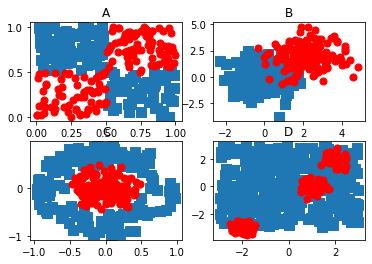

In [3]:


from numpy import *
import matplotlib
import matplotlib.pyplot as plt

xcord0 = []; ycord0 = []; xcord1 = []; ycord1 = []
markers =[]
colors =[]
fr = open('testSet.txt')#this file was generated by 2normalGen.py
for line in fr.readlines():
    lineSplit = line.strip().split('\t')
    xPt = float(lineSplit[0])
    yPt = float(lineSplit[1])
    label = int(lineSplit[2])
    if (label == 0):
        xcord0.append(xPt)
        ycord0.append(yPt)
    else:
        xcord1.append(xPt)
        ycord1.append(yPt)

fr.close()
fig = plt.figure()
ax = fig.add_subplot(221)
xcord0 = []; ycord0 = []; xcord1 = []; ycord1 = []
for i in range(300):
    [x,y] = random.uniform(0,1,2)
    if ((x > 0.5) and (y < 0.5)) or ((x < 0.5) and (y > 0.5)):
        xcord0.append(x); ycord0.append(y)
    else:
        xcord1.append(x); ycord1.append(y)
ax.scatter(xcord0,ycord0, marker='s', s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
plt.title('A')
ax = fig.add_subplot(222)
xcord0 = random.standard_normal(150); ycord0 = random.standard_normal(150)
xcord1 = random.standard_normal(150)+2.0; ycord1 = random.standard_normal(150)+2.0
ax.scatter(xcord0,ycord0, marker='s', s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
plt.title('B')
ax = fig.add_subplot(223)
xcord0 = []; ycord0 = []; xcord1 = []; ycord1 = []
for i in range(300):
    [x,y] = random.uniform(0,1,2)
    if (x > 0.5):
        xcord0.append(x*cos(2.0*pi*y)); ycord0.append(x*sin(2.0*pi*y))
    else:
        xcord1.append(x*cos(2.0*pi*y)); ycord1.append(x*sin(2.0*pi*y))
ax.scatter(xcord0,ycord0, marker='s', s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
plt.title('C')
ax = fig.add_subplot(224)
xcord1 = zeros(150); ycord1 = zeros(150)
xcord0 = random.uniform(-3,3,350); ycord0 = random.uniform(-3,3,350);
xcord1[0:50] = 0.3*random.standard_normal(50)+2.0; ycord1[0:50] = 0.3*random.standard_normal(50)+2.0

xcord1[50:100] = 0.3*random.standard_normal(50)-2.0; ycord1[50:100] = 0.3*random.standard_normal(50)-3.0

xcord1[100:150] = 0.3*random.standard_normal(50)+1.0; ycord1[100:150] = 0.3*random.standard_normal(50)
ax.scatter(xcord0,ycord0, marker='s', s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
plt.title('D')
plt.show()
    
    








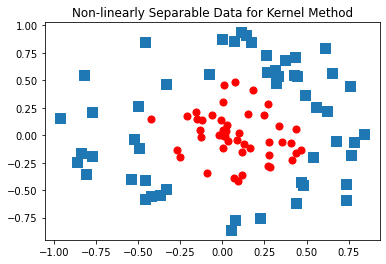

In [4]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

xcord0 = []; ycord0 = []; xcord1 = []; ycord1 = []
fw = open('testSetRBF2.txt', 'w')#generate data

fig = plt.figure()
ax = fig.add_subplot(111)
xcord0 = []; ycord0 = []; xcord1 = []; ycord1 = []
for i in range(100):
    [x,y] = random.uniform(0,1,2)
    xpt=x*cos(2.0*pi*y); ypt = x*sin(2.0*pi*y)
    if (x > 0.5):
        xcord0.append(xpt); ycord0.append(ypt)
        label = -1.0
    else:
        xcord1.append(xpt); ycord1.append(ypt)
        label = 1.0
    fw.write('%f\t%f\t%f\n' % (xpt, ypt, label))
ax.scatter(xcord0,ycord0, marker='s', s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
plt.title('Non-linearly Separable Data for Kernel Method')
plt.show()
fw.close()


### SMO算法内涵：将大优化问题分解为多个小优化问题
### 目标：求出一系列的alpha和b，用于求解权重向量w，从而得到超平面
### 工作原理：每次循环中选择两个alpha进行优化处理

In [55]:


# 基于SMO的简化例子
from numpy import *
from time import sleep

def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

# 参数分别表示第一个alpha的下标，所有alpha的数目
def selectJrand(i,m):
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(random.uniform(0,m))
    return j

# 调整大于H或或小于L的alpha值
def clipAlpha(aj,H,L):
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj

dataArr,labelArr=loadDataSet(r'testSet.txt')
labelArr




[[-3.83694229]] [[0.08643105 0.27918952 0.05193635 0.31368422]]
[4.658191, 3.507396] -1.0
[3.457096, -0.082216] -1.0
[5.286862, -2.358286] 1.0
[6.080573, 0.418886] 1.0


# 构建SMO简化版函数
### 伪代码
### 创建一个alpha向量并将其初始化为0向量
### 当迭代次数小于最大迭代次数时（外循环）：
     对数据集中的每个数据向量（内循环）：
         如果该数据的向量可以被优化：
             随机选择另外一个数据向量
             同时优化这两个向量
             如果两个向量都不可被优化，推出内循环
     如果所有向量都未被优化，增加迭代次数，继续下一次循环
### 输入参数分别为 数据集、分类标签、常数c、容错率、退出前最大迭代次数

In [ ]:



def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    # 将数据集和标签转换为矩阵
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    # 初始化bias=0
    b = 0
    m,n = shape(dataMatrix)
    # 初始化alpha为mx1的0向量
    alphas = mat(zeros((m,1)))
    iter = 0
    # 进行迭代
    while (iter < maxIter):
        # 该变量用于记录alpha是否进行优化
        alphaPairsChanged = 0
        # m为样本数
        for i in range(m):
            # 预测的类别fXi
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            # 误差Ei
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions
            # 如果误差较大（相对容错率而言），就对alpha进行优化，alpha取值为[0,C]，如果等于边界值就无需优化
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                # 利用辅助函数随机选择第二个alpha的值：alpha[j]
                j = selectJrand(i,m)
                # 计算误差
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                # 为两个列表分配新的内存，否则无法观察新旧值的变化
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                # 计算L于H，将alpha值调整至[0,C]区间
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: 
                    #print("L==H")
                    continue
                # eta表示alpha的最优修改量
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                # 如果eta等于0需要退出for循环的迭代过程
                if eta >= 0:
                    #print("eta>=0")
                    continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                # 利用辅助函数和L，H值对其调整
                alphas[j] = clipAlpha(alphas[j],H,L)
                # 检查alpha[j]的值是否改动，如果是就推出循环
                if (abs(alphas[j] - alphaJold) < 0.00001): 
                    #print("j not moving enough")
                    continue
                # 然后同时改变alpha[i]和alpha[j]的值
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                # the update is in the oppostie direction
                # 给两个alpha值设置一个常数项b
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                # print("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        # print("iteration number: %d" % iter)
    return b,alphas
b,alpha=smoSimple(dataArr,labelArr,0.6,0.001,40)
# 数组过滤:alpha[alpha>0]只对Numpy类型有用，不适用于正则表
print(b,alpha[alpha>0])
for i in range(100):
    if alpha[i]>0.0:
        print(dataArr[i],labelArr[i])


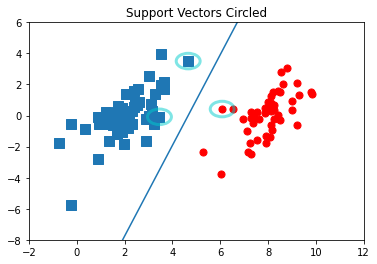

In [26]:

from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

xcord0 = []
ycord0 = []
xcord1 = []
ycord1 = []
markers =[]
colors =[]
fr = open('testSet.txt')#this file was generated by 2normalGen.py
for line in fr.readlines():
    lineSplit = line.strip().split('\t')
    xPt = float(lineSplit[0])
    yPt = float(lineSplit[1])
    label = int(lineSplit[2])
    if (label == -1):
        xcord0.append(xPt)
        ycord0.append(yPt)
    else:
        xcord1.append(xPt)
        ycord1.append(yPt)

fr.close()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord0,ycord0, marker='s', s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
plt.title('Support Vectors Circled')
circle = Circle((4.658191, 3.507396), 0.5, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)
circle = Circle((3.457096, -0.082216), 0.5, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)
circle = Circle((6.080573, 0.418886), 0.5, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)
#plt.plot([2.3,8.5], [-6,6]) #seperating hyperplane
b = -3.75567; w0=0.8065; w1=-0.2761
x = arange(-2.0, 12.0, 0.1)
y = (-w0*x - b)/w1
ax.plot(x,y)
ax.axis([-2,12,-8,6])
plt.show()


# 利用完整Platt SMO算法加速优化
### 该改进方法通过一个外循环来选择第一个alpha的值，并且选择过程会在两种方向之间交替进行
##### 一种方式是：在所有数据集上进行单遍扫描，；另外一种是在非边界alpha中实现单遍扫描
##### 非边界alpha是指不等于边界0或C的那些值
##### 选择第一个alpha后，会通过内循环来选择第二个alpha的值，优化过程中h会使用最大步长的方式来获取第二个alpha的值
##### 计算错误率时会建立一个全局缓存用于保存误差值，从中选取使得步长或者Ei-Ej最大的alpha值

In [67]:


class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        # 误差缓存
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag

    
def calcEk(oS, k):
    fXk = float(multiply(oS.alphas,oS.labelMat).T*oS.X*oS.X[k,:].T + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek
    
# 内循环中的启发式方法
def selectJ(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i:
                continue #don't calc for i, waste of time
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
            # 选择具有最大步长的j
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej
    
# 计算误差值，并存入缓存中，在优化alpha之后会用到这个值
def updateEk(oS, k):#after any alpha has changed update the new value in the cache
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]
    
# 类似于smoSimple()
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H:
            #print("L==H")
            return 0
        eta = 2.0 * oS.X[i,:]*oS.X[j,:].T - oS.X[i,:]*oS.X[i,:].T - oS.X[j,:]*oS.X[j,:].T #changed for kernel
        if eta >= 0:
            #print("eta>=0")
            return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001):
            # print("j not moving enough")
            return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[i,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[i,:]*oS.X[j,:].T
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[j,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[j,:]*oS.X[j,:].T
        
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0
    

def smoP(dataMatIn, classLabels, C, toler, maxIter,kTup=('lin', 0)):    #full Platt SMO
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    # 遍历所有的值
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS)
                # print("fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
        # 遍历边界值
        else:#go over non-bound (railed) alphas
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                # print("non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        # print("iteration number: %d" % iter)
    return oS.b,oS.alphas

b,alpha=smoP(dataArr,labelArr,0.6,0.001,40)
res=[]
for i in range(100):
    if alpha[i]>0.0:
        res.append(dataArr[i])
        print(dataArr[i],labelArr[i])


[3.542485, 1.977398] -1.0
[8.610639, 2.046708] 1.0
[3.634009, 1.730537] -1.0
[3.125951, 0.293251] -1.0
[2.893743, -1.643468] -1.0
[5.286862, -2.358286] 1.0
[6.080573, 0.418886] 1.0


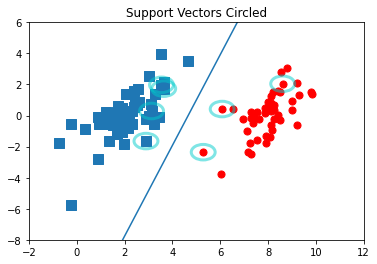

In [68]:

from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

xcord0 = []
ycord0 = []
xcord1 = []
ycord1 = []
markers =[]
colors =[]
fr = open('testSet.txt')#this file was generated by 2normalGen.py
for line in fr.readlines():
    lineSplit = line.strip().split('\t')
    xPt = float(lineSplit[0])
    yPt = float(lineSplit[1])
    label = int(lineSplit[2])
    if (label == -1):
        xcord0.append(xPt)
        ycord0.append(yPt)
    else:
        xcord1.append(xPt)
        ycord1.append(yPt)

fr.close()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord0,ycord0, marker='s', s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
plt.title('Support Vectors Circled')
for i in range(len(res)):
    circle = Circle((res[i][0], res[i][1]), 0.5, facecolor='none', edgecolor=(0,0.8,0.8), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
b = -3.75567; w0=0.8065; w1=-0.2761
x = arange(-2.0, 12.0, 0.1)
y = (-w0*x - b)/w1
ax.plot(x,y)
ax.axis([-2,12,-8,6])
plt.show()


In [76]:
# 基于alpha所得超平面计算w
def calcWs(alphas,dataArr,classLabels):
    X = mat(dataArr); labelMat = mat(classLabels).transpose()
    m,n = shape(X)
    w = zeros((n,1))
    for i in range(m):
        w += multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

ws=calcWs(alpha,dataArr,labelArr)
ws

# 对第一个数据点进行分类
dataMat=mat(dataArr)
predict=dataMat[0]*mat(ws)+b
true=labelArr[0]
print(predict,true)

[[-1.89204816]] -1.0


Text(0.5, 1.0, 'C')

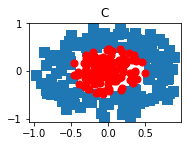

In [79]:
# 在复杂数据集上使用核函数
# 数据图示类似于下图
# 非线性可分数据

from numpy import *
import matplotlib
import matplotlib.pyplot as plt

xcord0 = []; ycord0 = []; xcord1 = []; ycord1 = []
markers =[]
colors =[]
fr = open('testSet.txt')#this file was generated by 2normalGen.py
for line in fr.readlines():
    lineSplit = line.strip().split('\t')
    xPt = float(lineSplit[0])
    yPt = float(lineSplit[1])
    label = int(lineSplit[2])
    if (label == 0):
        xcord0.append(xPt)
        ycord0.append(yPt)
    else:
        xcord1.append(xPt)
        ycord1.append(yPt)

fr.close()
fig = plt.figure()
ax = fig.add_subplot(223)
xcord0 = []; ycord0 = []; xcord1 = []; ycord1 = []
for i in range(300):
    [x,y] = random.uniform(0,1,2)
    if (x > 0.5):
        xcord0.append(x*cos(2.0*pi*y)); ycord0.append(x*sin(2.0*pi*y))
    else:
        xcord1.append(x*cos(2.0*pi*y)); ycord1.append(x*sin(2.0*pi*y))
ax.scatter(xcord0,ycord0, marker='s', s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
plt.title('C')

# 对于上述非线性可分数据，可以使用核函数将其映射到高维空间
# 可以将核函数想象成一个包装器或者接口，它能把数据从一个很难处理的形式转换成一个较为容易处理的形式
# 核技巧：将向量内积替换成核函数的方式

### 径向基核函数：一个采用向量作为自变量的函数，能够基于向量距离运算输出一个标量
### 径向基函数的高斯版本：k(x,y)=exp(-||x-y||^2/2thegma^2)
### 其中thegma是用户定义的达到率：函数跌落到0的速度参数

##### 核转换函数
##### 三个输入参数分别为：kTup是核函数的信息，数据类型为元组；另外两个为数值型数据，为可选参数

In [87]:

def kernelTrans(X, A, kTup): #calc the kernel or transform data to a higher dimensional space
    m,n = shape(X)
    K = mat(zeros((m,1)))
    if kTup[0]=='lin': K = X * A.T   #linear kernel
    elif kTup[0]=='rbf':
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = exp(K/(-1*kTup[1]**2)) #divide in NumPy is element-wise not matrix like Matlab
    # 如果遇到无法识别的元组就抛出异常
    else: raise NameError('Houston We Have a Problem -- \
    That Kernel is not recognized')
    return K

##### 新版本的optStruct
class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        # 全局的K只需要计算一次
        self.K = mat(zeros((self.m,self.m)))
        # kTup是一个包含核函数的元组
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)

# 更新后的inerL函数
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: 
            # print("L==H")
            return 0
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] #changed for kernel
        if eta >= 0:
            # print("eta>=0")
            return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001):
            # print("j not moving enough")
            return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0

# 更新后的calEk函数
def calcEk(oS, k):
    fXk = float(multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek

def smoP(dataMatIn, classLabels, C, toler, maxIter,kTup=('lin', 0)):    #full Platt SMO
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler, kTup)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS)
                # print("fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
        else:#go over non-bound (railed) alphas
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                # print("non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        # print("iteration number: %d" % iter)
    return oS.b,oS.alphas


def calcWs(alphas,dataArr,classLabels):
    X = mat(dataArr); labelMat = mat(classLabels).transpose()
    m,n = shape(X)
    w = zeros((n,1))
    for i in range(m):
        w += multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

# 测试核函数
def testRbf(k1=0.1):
    dataArr,labelArr = loadDataSet('testSetRBF.txt')
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, ('rbf', k1)) #C=200 important
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    svInd=nonzero(alphas.A>0)[0]
    sVs=datMat[svInd] #get matrix of only support vectors
    labelSV = labelMat[svInd];
    # print("there are %d Support Vectors" % shape(sVs)[0])
    m,n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    # print("the training error rate is: %f" % (float(errorCount)/m))
    dataArr,labelArr = loadDataSet('testSetRBF2.txt')
    errorCount = 0
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1    
    # print("the test error rate is: %f" % (float(errorCount)/m))
    
testRbf()

# 案例1：手写识别问题：
### 基于SVM的数字识别
### 搜集数据：文本读取
### 准备数据：基于二值图像构造向量
### 分析数据：对图向量进行目测
### 训练算法：采用两种不同的核函数，并对径向核函数采用不同的设置来运行SMO算法
### 测试算法：编写一个函数来测试不同核函数并计算错误率
### 使用算法：一个简单图像识别

In [92]:


def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

def loadImages(dirName):
    from os import listdir
    hwLabels = []
    trainingFileList = listdir(dirName)           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        if classNumStr == 9: hwLabels.append(-1)
        else: hwLabels.append(1)
        trainingMat[i,:] = img2vector('%s/%s' % (dirName, fileNameStr))
    return trainingMat, hwLabels    

def testDigits(kTup=('rbf', 10)):
    dataArr,labelArr = loadImages(r'digits/trainingDigits')
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, kTup)
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    svInd=nonzero(alphas.A>0)[0]
    sVs=datMat[svInd] 
    labelSV = labelMat[svInd];
    # print("there are %d Support Vectors" % shape(sVs)[0])
    m,n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],kTup)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    a=(float(errorCount)/m)
    # print("the training error rate is: %f" % (float(errorCount)/m))
    dataArr,labelArr = loadImages(r'digits/testDigits')
    errorCount = 0
    datMat=mat(dataArr); labelMat = mat(labelArr).transpose()
    m,n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],kTup)
        predict=kernelEval.T * multiply(labelSV,alphas[svInd]) + b
        if sign(predict)!=sign(labelArr[i]): errorCount += 1
    b=(float(errorCount)/m)
    # print("the test error rate is: %f" % (float(errorCount)/m))
    return a,b, shape(sVs)[0]

print("内核，设置   训练错误率   测试错误率  支持向量数",end="\n")
for i in [0.1,5,10,50,100]:
    a,b,c=testDigits(kTup=('rbf', i))
    print("RBF,%.1f    %.2f    %.2f    %d"%(i,a,b,c),end="\n")





内核，设置   训练错误率   测试错误率  支持向量数
RBF,0.1    0.00    0.52    402
RBF,5.0    0.00    0.03    402
RBF,10.0    0.00    0.01    132
RBF,50.0    0.01    0.01    34
RBF,100.0    0.01    0.01    32


# 本章小结：
### 支持向量机是一种分类器
### 之所以称之为”机“，是因为它会产生一个二值决策结果，即它是一种决策”机“
### 支持向量机的泛化错误率较低，具有良好的学习能力，且学到的结果具有推广性
### 核方法或者核技巧会将数据（有时为非线性数据）从一个低维空间映射到一个高维空间，可以将一个在低维空间的非线性问题转换到高维空间的线性问题求解
